In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [151]:
data = pd.read_csv('TrainSales.csv')

In [152]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


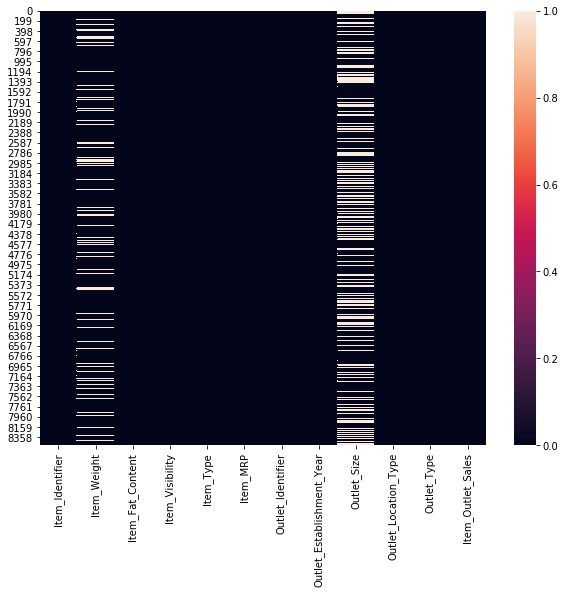

In [153]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [154]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [156]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Consolidating Item Fat Content Values

In [157]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

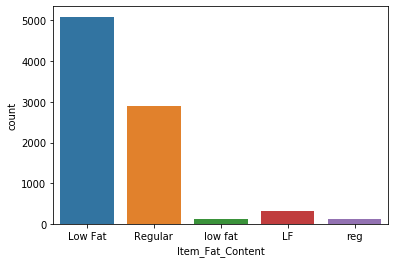

In [158]:
sns.countplot(x=data['Item_Fat_Content'], data=data)

In [159]:
def replace_item(item):
    if (item == 'Low Fat'):
        return 'LF'
    elif (item == 'Regular'):
        return 'RE'
    elif item == 'low fat' :
        return 'LF'
    elif item == 'reg':
        return 'RE'
    elif item == 'LF':
        return 'LF'
    else :
        return 'OT'

In [160]:
#data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat':'LF','Regular':'RE','low fat':'LF','reg':'RE', np.NaN:0})
data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(replace_item)

In [161]:
data['Item_Fat_Content'].unique()

array(['LF', 'RE'], dtype=object)

In [162]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Imputation

#### Imputing missing Item Weights

**Lets see average Item weight based on Item Fat Content**

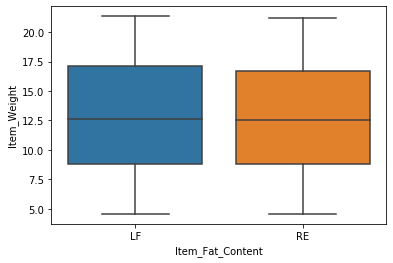

In [163]:
sns.boxplot(x=data['Item_Fat_Content'], y=data['Item_Weight'], data=data)

**Lets see average item weight based on Item type and fat content now**

In [164]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

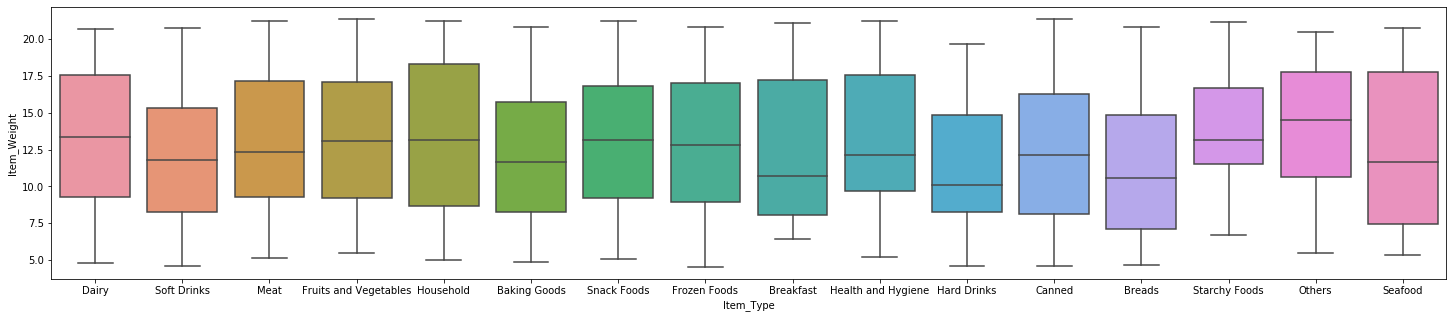

In [165]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['Item_Type'], y=data['Item_Weight'], data=data)

In [166]:
a = data.groupby(['Item_Type','Item_Fat_Content']).mean()['Item_Weight']

In [167]:
mean_weight_type_fat = data.groupby(['Item_Type','Item_Fat_Content']).mean()

In [168]:
mean_weight_type_fat = mean_weight_type_fat.reset_index(level=1).reset_index(level=0)

In [169]:
mean_weight_type_fat

,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,LF,12.552996,0.066150,120.525869,1997.310030,1764.509636
1,Baking Goods,RE,12.013303,0.072283,132.419203,1998.159875,2147.340665
2,Breads,LF,12.429912,0.067815,134.582184,1997.592857,2183.434031
3,Breads,RE,10.002143,0.064287,148.987514,1997.738739,2230.238058
4,Breakfast,LF,11.849412,0.091970,165.259673,1997.292683,2425.411966
5,Breakfast,RE,13.336182,0.082011,127.841304,1997.362319,1925.464652
6,Canned,LF,11.864650,0.072913,139.552518,1998.372434,2208.714377
7,Canned,RE,12.804289,0.062833,139.997787,1997.909091,2243.441202
8,Dairy,LF,13.391497,0.069884,147.115989,1997.772727,2145.174151
9,Dairy,RE,13.483797,0.076454,150.689305,1997.537879,2370.875970


In [170]:
filter1 = mean_weight_type_fat['Item_Type']=='Baking Goods'

In [171]:
filter2 = mean_weight_type_fat['Item_Fat_Content']=='LF'

In [172]:
mean_weight_type_fat.where(filter1 & filter2 )[:1]

,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,LF,12.552996,0.06615,120.525869,1997.31003,1764.509636


In [173]:
mean_weight_type_fat.where(filter1 & filter2 )[:1]['Item_Weight']

0    12.552996
Name: Item_Weight, dtype: float64

In [174]:
#data[['Item_Fat_Content','Item_Weight','Item_Type']].apply(null_imputer)
data2 = data.copy()

In [175]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [176]:
data2.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,RE,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,RE,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [177]:
def show_me():
    filter1 = mean_weight_type_fat['Item_Type']=='Baking Goods'
    filter2 = mean_weight_type_fat['Item_Fat_Content']=='LF'
    weight1 = mean_weight_type_fat.where(filter1 & filter2 )[:1]['Item_Weight']
    print(weight1[0])
    return weight1

#### Imputing the Averge values based on Item Type and Fat Content

In [178]:
#This is not working, try to make it work
#For now commenting this out and doing it in a simple broader way
#def null_imputer(item):
#    item_weight = item[0]
#    item_type = item[1]
#    item_fat = item[2]
#    if pd.isnull(item_weight) :
#        print('Item Type: ',item_type)
#        filter1 = mean_weight_type_fat['Item_Type']==item_type
#        print('Item_Fat: ', item_fat)
#        filter2 = mean_weight_type_fat['Item_Fat_Content']==item_fat
#        weight2 = mean_weight_type_fat.where(filter1 & filter2 )[:1]['Item_Weight']
#        print(weight2[0])
#        return weight2[0]
#    else:
#        return item_weight

In [179]:
def null_imputer(item):
    item_weight = item[0]
    item_type = item[1]
    item_fat = item[2]
    if pd.isnull(item_weight) :
        return 12.5
    else:
        return item_weight

In [180]:
#data[['Item_Fat_Content','Item_Weight','Item_Type']].apply(null_imputer)
data2['Item_Weight'] = data2[['Item_Weight','Item_Type','Item_Fat_Content']].apply(null_imputer, axis=1)

In [181]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Investigating 'Tier 3' Grocery missing values**

In [182]:
#data2[data2['Outlet_Location_Type']=='Tier 3']

In [183]:
temp_df = data2[data2['Outlet_Size'].isnull()]

In [184]:
temp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,RE,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [185]:
print("Missing Values from Tier: ", temp_df['Outlet_Location_Type'].unique())
print("Missing Values from Outlet Type: ", temp_df['Outlet_Type'].unique())

Missing Values from Tier:  ['Tier 3' 'Tier 2']
Missing Values from Outlet Type:  ['Grocery Store' 'Supermarket Type1']


### First Observation:
All the missing values in 'Outlet_Type' are either from: 
- Tier 2 or Tier 3
- Grocery Store or Supermarket Type 1

**Checking for 'Tier 2' and what all Outlet types it has, checking the sale range of non-missing 'Outlet size' and will assign the outlet size accordingly.**

In [186]:
temp2 = data2[data2['Outlet_Location_Type']=='Tier 2']

In [187]:
temp2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,LF,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,LF,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080


In [188]:
temp2['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

**We mostly have values for Outlet Size 'Small', hence we are missing 'Medium' and 'High'**

Lets check for what outlet types and Supermarket types we are actually missing the Outlet size values:

In [189]:
print("We are missing the Outlet Size values for Market Type: ",temp2[temp2['Outlet_Size'].isnull()]['Outlet_Type'].unique())

We are missing the Outlet Size values for Market Type:  ['Supermarket Type1']


**We are missing the following for Tier 2:**
- Missing 'Outlet Size' for 'Supermarket Type 1'

Lets check what Outlet Size we have for other Outlet Types

In [190]:
temp2[temp2['Outlet_Type']=='Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [191]:
temp2[temp2['Outlet_Type']=='Supermarket Type3']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [192]:
temp2[temp2['Outlet_Type']=='Supermarket Type2']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [193]:
temp2[temp2['Outlet_Type']=='Supermarket Type1'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,LF,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,LF,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080


WHat we concluded from above 3 results is, **for Tier 2**: 
- There are no Outlet types as 'Supermarket 2, Supermarket2, Grocery Store' 

In [194]:
#Lets check what High and Medium are assigned to

In [195]:
temp2[temp2['Outlet_Size']=='Medium']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [196]:
temp2[temp2['Outlet_Size']=='Medium']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**Apparantly, there are no High and Medium assigned to Outlet Size. 
Hence we will try to fill for Small first. 
Lets get the min and max range for Outlet Size 'Small'**

In [197]:
#Checking Maximum Sale for 'Tier 2'
temp2[temp2['Outlet_Size']=='Small']['Item_Outlet_Sales'].max()

8479.6288

In [198]:
#Checking Maximum Sale for 'Tier 2'
temp2[temp2['Outlet_Size']=='Small']['Item_Outlet_Sales'].min()

113.8518

### Impuataion 1 concept:
#### Hence anything with 'Tier 2' and 'Supermarket Type1' 
- within range less than 8479.6288, we will assign Outlet Type as 'Small'

**Now Checking for Tier 3**

In [199]:
temp3 = data2[data2['Outlet_Location_Type']=='Tier 3']

In [200]:
temp3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,RE,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,RE,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [201]:
temp3['Outlet_Size'].unique()

array(['Medium', nan, 'High'], dtype=object)

Looks like we mostly have Medium and high Outlets type in here. We are missing 'Small' if there are any. 

In [202]:
#Checking for what outlet types and Supermarket types we are actually missing the Outlet size values:
print("We are missing the Outlet Size values for Market Type: ",temp3[temp3['Outlet_Size'].isnull()]['Outlet_Type'].unique())

We are missing the Outlet Size values for Market Type:  ['Grocery Store']


Checking Ranges for Medium and High

In [203]:
#This will give you dataframe whre all the Outlet Size assigned for 'Medium'
temp3[temp3['Outlet_Size']=='Medium'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,RE,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDP10,12.500,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
16,NCB42,11.800,LF,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
18,DRI11,12.500,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [204]:
#Lets check what is the minimum assigned range for 'Medium'
temp3[temp3['Outlet_Size']=='Medium']['Item_Outlet_Sales'].min()

69.2432

In [205]:
#Similarly, lets check what is the minimum assigned range for 'Medium'
#temp3[temp3['Outlet_Size']=='High']['Item_Outlet_Sales'].min()

In [206]:
temp3[temp3['Outlet_Size']=='High'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.65,RE,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
14,FDF32,16.35,LF,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
20,FDN22,18.85,RE,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
27,DRJ59,11.65,LF,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312


### Imputation Concept 2:
#### If you notice here, it looks like the Sales does not matter, 
- If it is 'Tier 3' 'Supermarket Type 1' - its High
- If it is 'Tier 3' 'Supermarket Type 2 and 3' - its Medium
Hence, 
apparently, 
- If it is 'Tier 3' 'Grocery Store' - its Low

### Implementing Imputation Concept 1 & 2:

In [207]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [208]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [209]:
def size_imputer(item):
    size = item[0]
    tier = item[1]
    out_type = item[2]
    sales = item[3]
    
    if pd.isnull(size) :
        if tier == 'Tier 3' :
            if out_type == 'Grocery Store':
                return 'Low'
            elif out_type == 'Supermarket Type1':
                return 'High'
            else:
                return 'Medium'
        elif tier == 'Tier 2':
            if out_type == 'Supermarket Type1':
                if sales < 8479.6288 :
                    return 'Low'
                else:
                    return 'Medium'
        else:
            return size
    else:
        return size

In [210]:
data3 = data2.copy()

In [211]:
data3['Outlet_Size'] = data3[['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].apply(size_imputer, axis=1)

In [212]:
data3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [213]:
data3[data3['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Hence we have now successfully imputer all the values

In [214]:
data3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Low,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [215]:
#sns.pairplot(data3)

In [216]:
data4 = data3.copy()

In [217]:
data4.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [218]:
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Low,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Getting Dummies

In [219]:
fat_df = pd.get_dummies(data4['Item_Fat_Content'], drop_first=True, prefix='Item_Fat_Content')

In [220]:
item_type_df = pd.get_dummies(data4['Item_Type'], drop_first=True, prefix='Item_Type')

In [221]:
outlet_size_df = pd.get_dummies(data4['Outlet_Size'], drop_first=True, prefix='Outlet_Size')

In [222]:
outlet_type_df = pd.get_dummies(data4['Outlet_Type'], drop_first=True, prefix='Outlet_Type')

In [223]:
tier_df = pd.get_dummies(data4['Outlet_Location_Type'], drop_first=True)

In [224]:
tier_df.head()

,Tier 2,Tier 3
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1


In [225]:
data4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [226]:
final_df = pd.concat([data4[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']],fat_df,item_type_df,outlet_size_df,
                     outlet_type_df,tier_df], axis=1)

In [227]:
pd.set_option('display.max.columns',None)

In [228]:
final_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_RE,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Low,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Tier 2,Tier 3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [229]:
X = final_df.drop(['Item_Outlet_Sales'], axis=1)
y = final_df['Item_Outlet_Sales']

In [230]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_RE,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Low,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Tier 2,Tier 3
0,9.30,0.016047,249.8092,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,5.92,0.019278,48.2692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,17.50,0.016760,141.6180,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,19.20,0.000000,182.0950,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Fitting few models without splitting

#### 1. Statsmodel OLS 

In [231]:
import statsmodels.api as sm

In [232]:
x1 = sm.add_constant(X)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [233]:
results = sm.OLS(y,x1).fit()

In [234]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     406.7
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:24:04   Log-Likelihood:                -71987.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1897.7235    145.768    -13.019      0.000   -2183.464   -1611.983
Item_Weight                        -0.4137      2.914     -0.142      0.887      -6.126       5.299
Item_Visibility                  -301.3041    248.675     -1.212      0.226    -788.767     186.159
Item_MRP                           15.5546      0.198     78.695      0.000      15.167      15.942
Item_Fat_Content_RE                41.2598     28.225      1.462      0.144     -14.067      96.587
Item_Type_Breads                    0.4941     84.022      0.006      0.995    -164.209     165.197
Item_Type_Breakfast                 7.5126    116.584      0.064      0.949    -221.020     236.045
Item_Type_Canned                   23.8615     62.755      0.380      0.704     -99.154     146.877
Item_Type_Dairy                   -41.3788     62.217     -0.665      0.506    -163.339      80.582
Item_Type_Frozen Foods            -26.6009     58.853     -0.452      0.651    -141.967      88.766
Item_Type_Fruits and Vegetables    27.0863     54.947      0.493      0.622     -80.624     134.797
Item_Type_Hard Drinks              -4.2537     90.168     -0.047      0.962    -181.005     172.497
Item_Type_Health and Hygiene       -9.6196     67.999     -0.141      0.888    -142.914     123.675
Item_Type_Household               -40.0988     59.910     -0.669      0.503    -157.538      77.340
Item_Type_Meat                     -0.5845     70.635     -0.008      0.993    -139.047     137.878
Item_Type_Others                  -23.1439     98.598     -0.235      0.814    -216.420     170.132
Item_Type_Seafood                 177.6245    147.971      1.200      0.230    -112.434     467.683
Item_Type_Snack Foods             -13.5889     55.239     -0.246      0.806    -121.870      94.692
Item_Type_Soft Drinks             -27.6964     70.157     -0.395      0.693    -165.221     109.829
Item_Type_Starchy Foods            20.9201    103.019      0.203      0.839    -181.021     222.861
Outlet_Size_Low                   -78.5864     86.290     -0.911      0.362    -247.735      90.562
Outlet_Size_Medium                251.3447     97.374      2.581      0.010      60.467     442.222
Outlet_Size_Small                  94.4914     97.545      0.969      0.333     -96.721     285.704
Outlet_Type_Supermarket Type1    1858.5313     62.628     29.676      0.000    1735.765    1981.297
Outlet_Type_Supermarket Type2    1298.7791     92.196     14.087      0.000    1118.053    1479.506
Outlet_Type_Supermarket Type3    3025.5468     92.209     32.812      0.000    2844.795    3206.299
Tier 2                            203.7580     52.036      3.916      0.000     101.755     305.761
Tier 3                            155.1341     82.285      1.885      0.059      -6

**Choosing Important features as per the table and refitting model with important features**

In [235]:
x2 = x1[['const','Item_MRP','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3',
        'Tier 2','Tier 3']]

In [236]:
results2 = sm.OLS(y,x2).fit()

In [237]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1822.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:24:07   Log-Likelihood:                -72004.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8516   BIC:                         1.441e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1834.4613     48.081    -38.153      0.000   -1928.712   -1740.210
Item_MRP                         15.5619      0.197     79.190      0.000      15.177      15.947
Outlet_Type_Supermarket Type1  1950.4084     41.003     47.568      0.000    1870.033    2030.784
Outlet_Type_Supermarket Type2  1642.6610     53.795     30.535      0.000    1537.209    1748.113
Outlet_Type_Supermarket Type3  3370.4081     53.699     62.765      0.000    3265.145    3475.672
Tier 2                           11.2120     32.785      0.342      0.732     -53.054      75.478
Tier 3                          -17.4914     37.836     -0.462      0.644     -91.659      56.677
==============================================================================
Omnibus:                      960.485   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.096
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.163   Cond. No.                         965.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Does not look like much of an improvement**

#### 2. SVR Model

In [238]:
from sklearn.svm import SVR
svr = SVR()

In [239]:
svr.fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [240]:
svr.score(X,y)

-0.009935130070567011

**Very poor model**. This is not a good choice of model for this kind of data. May be we need to change the kernel

#### 3. Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [242]:
rfr.fit(X,y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [243]:
rfr.score(X,y)

0.9173071063755602

**Damn! this looks like a good model. Lets Split and move ahead with Random Forest Regressor**

In [244]:
rfr.feature_importances_

array([0.05264501, 0.10479923, 0.45149649, 0.00960859, 0.00291101,
       0.00224888, 0.00417941, 0.00748878, 0.00537263, 0.00899587,
       0.00298851, 0.00464897, 0.00663805, 0.00369479, 0.00175151,
       0.00144176, 0.00822466, 0.00468053, 0.00277213, 0.00657436,
       0.05224569, 0.00873625, 0.09911005, 0.0217324 , 0.10886507,
       0.00952995, 0.00661941])

### Splitting data into train & test

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
sc = StandardScaler()

In [249]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [250]:
rfr2 = RandomForestRegressor()

In [251]:
rfr2.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [252]:
predictions = rfr2.predict(X_test)

In [253]:
rfr2.score(X_train, y_train)

0.9176317645228028

In [254]:
rfr2.score(X_test, predictions)

1.0

In [255]:
from sklearn import metrics

In [256]:
print(metrics.mean_absolute_error(y_test, predictions))

803.2765295580759


In [257]:
print(metrics.mean_squared_error(y_test, predictions))

1307508.0892736004


In [258]:
##Loading test data

In [259]:
test_data = pd.read_csv('TestSales.csv')

In [260]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Data Cleaning and Conversion

In [261]:
#Replacing Item Fat content classifying into 'LF' and 'RE'
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].apply(replace_item)

In [262]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,LF,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,RE,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,LF,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,LF,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,RE,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [263]:
data['Item_Fat_Content'].unique()

array(['LF', 'RE'], dtype=object)

In [264]:
#Imputing Missing item weights
test_data['Item_Weight'] = test_data[['Item_Weight','Item_Type','Item_Fat_Content']].apply(null_imputer, axis=1)

In [265]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,LF,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,RE,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,LF,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,LF,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.500,RE,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [266]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [267]:
#This methos is slightly different from 'size_imputer'. Here we are not using the target variable to impute OutleSize
#Rather simply imputing everything as 'Small'
def size_imputer2(item):
    size = item[0]
    tier = item[1]
    out_type = item[2]
    
    if pd.isnull(size) :
        if tier == 'Tier 3' :
            if out_type == 'Grocery Store':
                return 'Low'
            elif out_type == 'Supermarket Type1':
                return 'High'
            else:
                return 'Medium'
        elif tier == 'Tier 2':
            if out_type == 'Supermarket Type1':
                return 'Low'
            else: 
                return 'Mediul'
        else:
            return size
    else:
        return size

In [268]:
## Imputing Outliet Size
test_data['Outlet_Size'] = test_data[['Outlet_Size','Outlet_Location_Type','Outlet_Type']].apply(size_imputer2, axis=1)

In [270]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Dummy Variable Conversions

In [271]:
fat_df1 = pd.get_dummies(test_data['Item_Fat_Content'], drop_first=True, prefix='Item_Fat_Content')
item_type_df1 = pd.get_dummies(test_data['Item_Type'], drop_first=True, prefix='Item_Type')
outlet_size_df1 = pd.get_dummies(test_data['Outlet_Size'], drop_first=True, prefix='Outlet_Size')
outlet_type_df1 = pd.get_dummies(test_data['Outlet_Type'], drop_first=True, prefix='Outlet_Type')
tier_df1 = pd.get_dummies(test_data['Outlet_Location_Type'], drop_first=True)

In [272]:
final_df1 = pd.concat([test_data[['Item_Weight','Item_Visibility','Item_MRP']],fat_df1,item_type_df1,outlet_size_df1,
                     outlet_type_df1,tier_df1], axis=1)

In [273]:
final_df1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_RE,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Low,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Tier 2,Tier 3
0,20.750,0.007565,107.8622,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,8.300,0.038428,87.3198,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,14.600,0.099575,241.7538,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,7.315,0.015388,155.0340,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,12.500,0.118599,234.2300,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


#### Predicting values

In [274]:
test_pred = rfr2.predict(final_df1)

In [275]:
rfr2.score(final_df1, test_pred)

1.0